In [3]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv("path_to_file\\semeion.data.txt", delimiter = " ", header=None)

In [6]:
data_features = data.iloc[:, : 256]
data_features
data_result = data.iloc[:, 256:266]
data_result.columns = range(10)
data_result.sample(5)

,0,1,2,3,4,5,6,7,8,9
283,0,0,0,0,1,0,0,0,0,0
1271,0,1,0,0,0,0,0,0,0,0
769,0,0,0,0,0,0,0,0,1,0
956,0,0,0,1,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,1,0


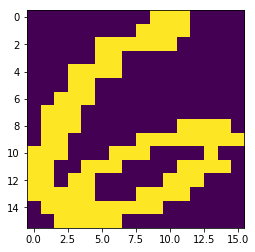

In [7]:
plt.imshow(data_features.loc[732].values.reshape((16,16)))

In [25]:
ft_train, ft_test, res_train, res_test = train_test_split(data_features.values, data_result.values, stratify=data_result.values)
knn = KNeighborsClassifier()
knn.fit(ft_train, res_train)
res_pred = knn.predict(ft_test)

In [26]:
metrics.accuracy_score(res_test, res_pred)

0.9072681704260651

In [33]:
params = { 
    "n_neighbors": range(2, 15, 3),
    "metric": [
        "braycurtis", "canberra", "hamming", "jaccard", "matching", "dice",
        "kulsinski", "rogerstanimoto", "russellrao", "sokalmichener", "sokalsneath"],
    "weights": ["uniform", "distance"]
}
knn_grid = GridSearchCV(knn, param_grid=params, scoring="accuracy")
knn_grid.fit(ft_train, res_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 15, 3), 'metric': ['braycurtis', 'canberra', 'hamming', 'jaccard', 'matching', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
knn_grid.best_params_

{'metric': 'braycurtis', 'n_neighbors': 2, 'weights': 'distance'}

In [35]:
params = { "n_neighbors": range(2, 5), "metric": ["braycurtis"], "weights": ["distance"] }
knn_grid = GridSearchCV(knn, param_grid=params, scoring="accuracy")
knn_grid.fit(ft_train, res_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 5), 'metric': ['braycurtis'], 'weights': ['distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
knn_grid.best_params_

{'metric': 'braycurtis', 'n_neighbors': 2, 'weights': 'distance'}

In [38]:
metrics.accuracy_score(res_test, knn_grid.best_estimator_.predict(ft_test))

0.9273182957393483